In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear regression

### Prediction

$$
\begin{align*}
\hat{y} &= \mathbf{w^\intercal x} + b \\
\end{align*}
$$

### Squared error loss
$$
\begin{align*}
L(\hat{y}, y) &= (\hat{y} - y)^2
\end{align*}
$$

### Squared error loss partial derivatives
$$
\begin{align*}
\frac{\partial L}{\partial \hat{y}} &= 2(\hat{y} - y)\\
\frac{\partial \hat{y}}{\partial \mathbf{w}} &= \mathbf{x} \\
\frac{\partial \hat{y}}{\partial b} &= 1 \\
\end{align*}
$$

### Mean squared error
$$
\begin{align*}
E(\mathbf{w}|\mathcal{D}) &= \frac{1}{N} \sum_{i = 1}^{N} L(\hat{y_i}, y_i) \\
&= \frac{1}{N} \sum_{i = 1}^{N} (\hat{y}_i - y_i)^2 \\
\end{align*}
$$

### Loss function gradients
$$
\begin{align*}
\frac{\partial L}{\partial \mathbf{w}} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \mathbf{w}} = 2(\hat{y} - y) \mathbf{x} \\
\frac{\partial L}{\partial b} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b} = 2(\hat{y} - y)
\end{align*}
$$

### Gradient descent updates
$$
\begin{align*}
\Delta \mathbf{w} &= \frac{\partial L}{\partial \mathbf{w}} =  2(\hat{y} - y) \mathbf{x}\\
\Delta b &= \frac{\partial L}{\partial b} = 2(\hat{y} - y) \\
\mathbf{w}_{t + 1} &= \mathbf{w}_{t} - \alpha \Delta \mathbf{w} \\
b_{t + 1} &= b_t - \alpha \Delta b
\end{align*}
$$

### Squared error loss in matrix form

$$
\begin{align*}
L &= (\mathbf{Xw} - \mathbf{y})^\intercal (\mathbf{Xw} - \mathbf{y}) \\
&= ((\mathbf{Xw})^\intercal - \mathbf{y}^\intercal) (\mathbf{Xw} - \mathbf{y}) \\
&= (\mathbf{w}^\intercal \mathbf{X}^\intercal - \mathbf{y}^\intercal) (\mathbf{Xw} - \mathbf{y}) \\
&= \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{y} - \mathbf{y}^\intercal \mathbf{Xw} + \mathbf{y}^\intercal \mathbf{y} \\
&= \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{y} - \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{y} + \mathbf{y}^\intercal \mathbf{y} \\
&= \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - 2\mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{y} + \mathbf{y}^\intercal \mathbf{y} \\
\end{align*}
$$

### Setting the partial derivative of the loss function with respect to weights to 0 we obtain the pseudoinverse parameters expression $\mathbf{X}^+ = (\mathbf{X}^\intercal \mathbf{X})^{-1}\mathbf{X}^\intercal$

$$\frac{\partial L}{\partial \mathbf{w}} = 2 \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - 2 \mathbf{X}^\intercal \mathbf{y}$$

$$
\begin{align*}
2 \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - 2 \mathbf{X}^\intercal \mathbf{y} &= 0 \\
\mathbf{X}^\intercal \mathbf{X} \mathbf{w} &= \mathbf{X}^\intercal \mathbf{y} \\
\mathbf{w} &= (\mathbf{X}^\intercal \mathbf{X})^{-1}\mathbf{X}^\intercal \mathbf{y}
\end{align*}
$$

***

In [2]:
from typing import Literal

class LinearRegression:

    def __init__(self, solver: Literal['pinv', 'grad'] = 'pinv', learning_rate: float = 1e-3, n_iter: int = 1000) -> None:
        """
        Linear Regression implemented using the Moore-Penrose pseudo-inverse and gradient descent.

        Parameters
        ----------
        solver : str, default='pinv'
            Solver algorithm, pseudoinverse (pinv) or gradient descent (grad).

        learning_rate : float, default=0.001
            Step size used in gradient descent. Ignored by pinv.

        n_iter : int, default=1000
            Number of iterations of gradient descent. Ignored by pinv.

        Attributes
        ----------
        bias : numpy.float64
            Coefficient obtained by fitting the model.

        weights : numpy.ndarray
            Vector of coefficients obtained by fitting the model.
        """
        self.solver = solver
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the linear model.

        Parameters
        ----------
        X : numpy.ndarray
            Training data of shape (n_samples, n_features).

        y : numpy.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        None
        """

        if self.solver == 'pinv':

            # Expand the input variables with bias terms
            X = np.hstack((np.ones((len(X), 1)), X))
            
            # Calculate weights using the pseudo-inverse
            self.weights = np.dot(np.linalg.pinv(X), y)

            # Bias is the first coeffiecient in the weights vector
            self.bias = self.weights[0]

            # All other coefficients are weights
            self.weights = self.weights[1:]

        elif self.solver == 'grad':

            # Extract the number of features (number of columns)
            n_features = X.shape[1]

            # Initialize weights to a zero vector of shape (n_features, )
            self.weights = np.zeros(n_features)
            # Initialize bias to zero
            self.bias = 0

            # Repeating gradient descent steps
            for _ in range(self.n_iter):

                # Predict values using current parameters
                y_pred = self.predict(X)

                # Gradient of the error function with respect to weights, calculated using the entire training data
                dw = 2 * np.dot(X.T, (y_pred - y))
                # Gradient of the error function with respect to bias
                db = np.sum(y_pred - y)
                
                # Update the weights
                self.weights -=  self.learning_rate * dw
                # Update the bias
                self.bias -= self.learning_rate * db            

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the linear model.

        Parameters
        ----------
        X : numpy.ndarray
            Samples of shape (n_samples, n_features).

        Returns
        -------
        y : numpy.ndarray
            Predicted values of shape (n_samples,).
        """
        # Predicted values are the dot product of samples and weights plus bias
        return np.dot(X, self.weights) + self.bias

## Linear regression with pseudoinverse

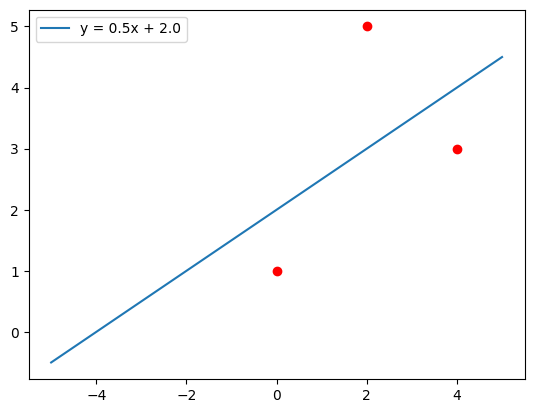

In [3]:
X = np.array([[0], [2], [4]])
y = np.array([1, 5, 3])

model = LinearRegression(solver='pinv')
model.fit(X, y)

x = np.linspace(-5, 5).reshape(-1, 1)
plt.scatter(X, y, color="red")
plt.plot(x, model.predict(x), label=f'y = {np.round(model.weights[0], 2)}x + {model.bias}')
plt.legend()
plt.show()

## Linear regression with gradient descent

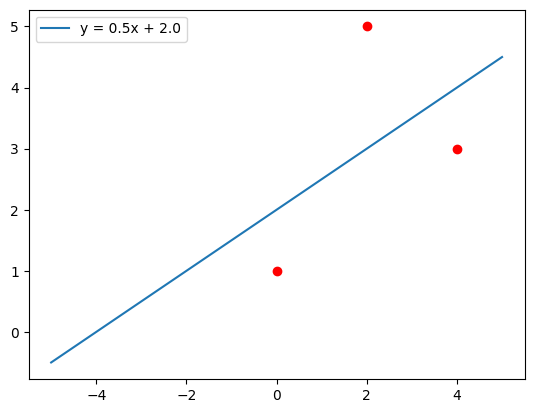

In [4]:
X = np.array([[0], [2], [4]])
y = np.array([1, 5, 3])

model2 = LinearRegression(solver='grad', learning_rate=1e-2)
model2.fit(X, y)

x = np.linspace(-5, 5).reshape(-1, 1)
plt.scatter(X, y, color="red")
plt.plot(x, model2.predict(x), label=f'y = {np.round(model2.weights[0], 2)}x + {np.round(model2.bias, 2)}')
plt.legend()
plt.show()

# Ridge regression

### Added regularization term to the loss function

$$
\begin{align*}
L &= (\mathbf{Xw} - \mathbf{y})^\intercal (\mathbf{Xw} - \mathbf{y}) + \lambda \mathbf{w}^\intercal \mathbf{w} \\
&= ((\mathbf{Xw})^\intercal - \mathbf{y}^\intercal) (\mathbf{Xw} - \mathbf{y}) + \lambda \mathbf{w}^\intercal \mathbf{w} \\
&= (\mathbf{w}^\intercal \mathbf{X}^\intercal - \mathbf{y}^\intercal) (\mathbf{Xw} - \mathbf{y}) + \lambda \mathbf{w}^\intercal \mathbf{w} \\
&= \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{y} - \mathbf{y}^\intercal \mathbf{Xw} + \mathbf{y}^\intercal \mathbf{y} + \lambda \mathbf{w}^\intercal \mathbf{w} \\
&= \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{y} - \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{y} + \mathbf{y}^\intercal \mathbf{y} + \lambda \mathbf{w}^\intercal \mathbf{w} \\
&= \mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - 2\mathbf{w}^\intercal \mathbf{X}^\intercal \mathbf{y} + \mathbf{y}^\intercal \mathbf{y} + \lambda \mathbf{w}^\intercal \mathbf{w} \\
\end{align*}
$$

### Setting the partial derivative of the loss function with respect to weights to 0 we obtain the parameters expression

$$\frac{\partial L}{\partial \mathbf{w}} = 2 \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - 2 \mathbf{X}^\intercal \mathbf{y} + 2 \lambda \mathbf{w}
$$

$$
\begin{align*}
2 \mathbf{X}^\intercal \mathbf{X} \mathbf{w} - 2 \mathbf{X}^\intercal \mathbf{y} + 2 \lambda \mathbf{w} &= 0 \\
\mathbf{X}^\intercal \mathbf{X} \mathbf{w} - \mathbf{X}^\intercal \mathbf{y} + \lambda \mathbf{w} &= 0\\
\mathbf{X}^\intercal \mathbf{X} \mathbf{w} + \lambda \mathbf{w} &= \mathbf{X}^\intercal \mathbf{y}\\
(\mathbf{X}^\intercal \mathbf{X} + \lambda \mathbf{I}) \mathbf{w} &= \mathbf{X}^\intercal \mathbf{y} \\
\mathbf{w} &= (\mathbf{X}^\intercal \mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^\intercal \mathbf{y}
\end{align*}
$$

### To solve for ridge regression parameters using pseudoinverse method $\mathbf{X}$ and $\mathbf{y}$ need to be augmented

$$\mathbf{X_{*}} = \begin{bmatrix} \mathbf{X} \\ \sqrt{\lambda} \mathbf{I_{m \times m}} \end{bmatrix}$$
$$\mathbf{y_{*}} = \begin{bmatrix} \mathbf{y} \\ 0_{m \times 1} \end{bmatrix}$$

### With augmentation we obtain the familiar squared error

$$ (\mathbf{Xw} - \mathbf{y})^\intercal (\mathbf{Xw} - \mathbf{y}) + \lambda \mathbf{w}^\intercal \mathbf{w} = (\mathbf{X_{*}w} - \mathbf{y_{*}})^\intercal (\mathbf{X_{*}w} - \mathbf{y_{*}})$$
***

In [5]:
class RidgeRegression:

    def __init__(self, lambda_param: float = 1.0, solver: Literal['pinv', 'grad'] = 'pinv', learning_rate: float = 1e-3, n_iter: int = 1000) -> None:
        """
        Ridge Regression implemented using the Moore-Penrose pseudo-inverse of a matrix.

        Parameters
        ----------
        lambda_param : float, default=1.0
            Regularization parameter.

        solver : str, default='pinv'
            Solver algorithm, pseudoinverse (pinv) or gradient descent (grad).

        learning_rate : float, default=0.001
            Step size used in gradient descent. Ignored by pinv.

        n_iter : int, default=1000
            Number of iterations of gradient descent. Ignored by pinv.

        Attributes
        ----------
        bias : numpy.float64
            Coefficient obtained by fitting the model.

        weights : numpy.ndarray
            Vector of coefficients obtained by fitting the model.
        """
        self.lambda_param = lambda_param
        self.solver = solver
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the ridge model.

        Parameters
        ----------
        X : numpy.ndarray
            Training data of shape (n_samples, n_features).

        y : numpy.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        None
        """

        if self.solver == 'pinv':

            # Expand the input variables with bias terms
            X = np.hstack((np.ones((len(X), 1)), X))

            # Get the number of features
            n_features = X.shape[1]

            # Augment X with an identity matrix
            X_aug = np.vstack((X, np.sqrt(self.lambda_param) * np.eye(n_features)))

            # Augment y with zeroes
            y_aug = np.hstack((y, np.zeros(n_features)))
            
            # Calculate weights using the pseudo-inverse
            self.weights = np.dot(np.linalg.pinv(X_aug), y_aug)

            # Bias is the first coeffiecient in the weights vector
            self.bias = self.weights[0]

            # All other coefficients are weights
            self.weights = self.weights[1:]

        elif self.solver == 'grad':

            # Extract the number of features (number of columns)
            n_features = X.shape[1]

            # Initialize weights to a zero vector of shape (n_features, )
            self.weights = np.zeros(n_features)
            # Initialize bias to zero
            self.bias = 0

            # Repeating gradient descent steps
            for _ in range(self.n_iter):

                # Predict values using current parameters
                y_pred = self.predict(X)

                # Gradient of the error function with respect to weights, calculated using the entire training data
                dw = 2 * (np.dot(X.T, (y_pred - y)) + self.lambda_param * self.weights)
                # Gradient of the error function with respect to bias
                db = np.sum(y_pred - y)
                
                # Update the weights
                self.weights -=  self.learning_rate * dw
                # Update the bias
                self.bias -= self.learning_rate * db 

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the ridge model.

        Parameters
        ----------
        X : numpy.ndarray
            Samples of shape (n_samples, n_features).

        Returns
        -------
        y : numpy.ndarray
            Predicted values of shape (n_samples,).
        """
        # Predicted values are the dot product of samples and weights plus bias
        return np.dot(X, self.weights) + self.bias

# Ridge Regression with pseudoinverse

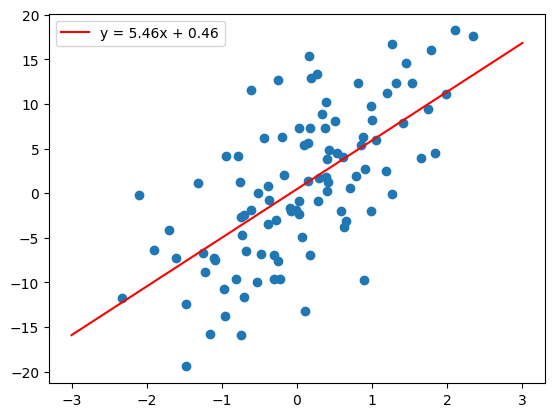

In [56]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=7.0, random_state=58)

model = RidgeRegression(lambda_param=5, solver='pinv')
model.fit(X, y)

x = np.linspace(-3, 3, 50)
plt.scatter(X, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red', label=f'y = {np.round(model.weights[0], 2)}x + {np.round(model.bias, 2)}')
plt.legend()
plt.show()

# Ridge Regression with gradient descent

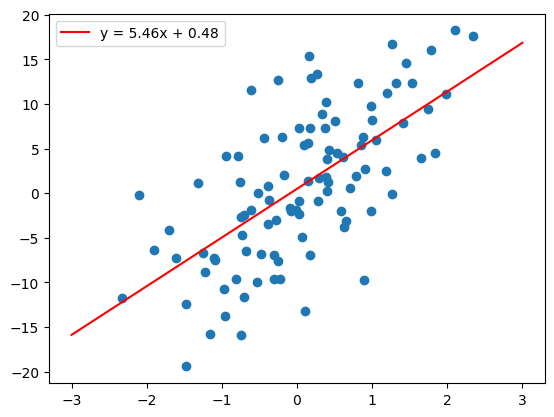

In [66]:
model = RidgeRegression(lambda_param=5, solver='grad', n_iter=2000, learning_rate=1e-3)
model.fit(X, y)

x = np.linspace(-3, 3, 50)
plt.scatter(X, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red', label=f'y = {np.round(model.weights[0], 2)}x + {np.round(model.bias, 2)}')
plt.legend()
plt.show()

# Polynomial regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures

class PolynomialRegression:

    def __init__(self, degree: int=2) -> None:
        """
        Polynomial Regression implemented using the Moore-Penrose pseudo-inverse of a matrix.

        Parameters
        ----------
        degree : int, default=2
            Degree of polynomial.

        Attributes
        ----------
        weights : numpy.ndarray 
            Vector of coefficients obtained by fitting the model. 
            Bias is included due to sklearn.preprocessing.PolynomialFeatures transformation.
        """
        self.poly = PolynomialFeatures(degree)

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the linear model.

        Parameters
        ----------
        X : numpy.ndarray
            Training data of shape (n_samples, n_features).

        y : numpy.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        None
        """
        # Expand the input variables with polynomial terms
        X = self.poly.fit_transform(X)
        
        # Calculate weights using the pseudo-inverse
        self.weights = np.dot(np.linalg.pinv(X), y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the linear model.

        Parameters
        ----------
        X : numpy.ndarray
            Samples of shape (n_samples, n_features).

        Returns
        -------
        y : numpy.ndarray
            Predicted values of shape (n_samples,).
        """
        return np.dot(self.poly.transform(X), self.weights)

## Fitting data to a polynomial regression model

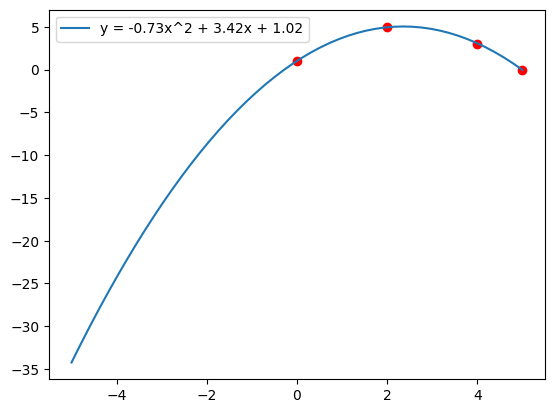

In [75]:
X = np.array([[0], [2], [4], [5]])
y = np.array([1, 5, 3, 0])

model = PolynomialRegression()
model.fit(X, y)

x = np.linspace(-5, 5).reshape(-1, 1)
plt.scatter(X, y, color="red")
plt.plot(x, model.predict(x), label=f'y = {np.round(model.weights[2], 2)}x^2 + {np.round(model.weights[1], 2)}x + {np.round(model.weights[0], 2)}')
plt.legend()
plt.show()

## Fitting data to a multiple linear regression model

In [9]:
X = np.array([[0, 1],
              [2, 5],
              [4, 3],
              [5, 0]])
y = np.array([50, 30, 20, 10])

model = LinearRegression(solver='pinv')
model.fit(X, y)

print(f'z = {np.round(model.weights[0], 2)}x + {np.round(model.weights[1], 2)}y + {np.round(model.bias, 2)}')

z = -7.74x + -0.6y + 50.12


In [10]:
model2 = LinearRegression(n_iter=2000, learning_rate=1e-2, solver='grad')
model2.fit(X, y)

print(f'z = {np.round(model2.weights[0], 2)}x + {np.round(model2.weights[1], 2)}y + {np.round(model2.bias, 2)}')

z = -7.74x + -0.6y + 50.12
